In [ ]:
!pip install -q rasterio

     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [ ]:
# Bibliotecas
import tifffile as tif
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Lendo imagens
with rio.open('/content/drive/MyDrive/Sentinel-1/iVV.tif') as src1:
  Svv_r = src1.read(1)
  meta = src1.meta
with rio.open('/content/drive/MyDrive/Sentinel-1/iVV.tif') as src2:
  Svv_i = src2.read(1)

with rio.open('/content/drive/MyDrive/Sentinel-1/qVH.tif') as src3:
  Svh_r = src3.read(1)

with rio.open('/content/drive/MyDrive/Sentinel-1/iVH.tif') as src4:
  Svh_i = src4.read(1)

In [ ]:
# Calculando elementos da matriz C2
C11 = (Svv_r * Svv_r) + (Svv_i * Svv_i)
C12_real = (Svv_r * Svh_r) + (Svv_i * Svh_i)
C12_imag = (Svv_i * Svh_r) - (Svv_r * Svh_i)
C22 = (Svh_r * Svh_r) + (Svh_i * Svh_i)

In [ ]:
#Função de expansão
def expansao(img, percent_ini=2, percent_fim=98):
    s = np.zeros_like(img)
    x,y = 0,255  
    w = np.percentile(img, percent_ini)
    z = np.percentile(img, percent_fim)        
    p = x + (img - w) * (y - x) / (z - w)    
    p[p<x] = x
    p[p>y] = y
    s = p
    return s

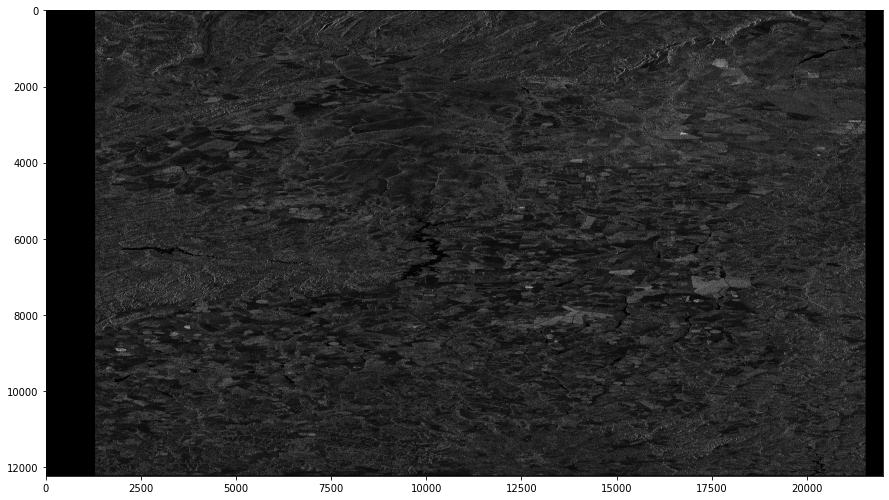

In [ ]:
#Visualizando elementos
plt.figure(figsize=(15,10))
plt.imshow(expansao(C11), cmap='gray')

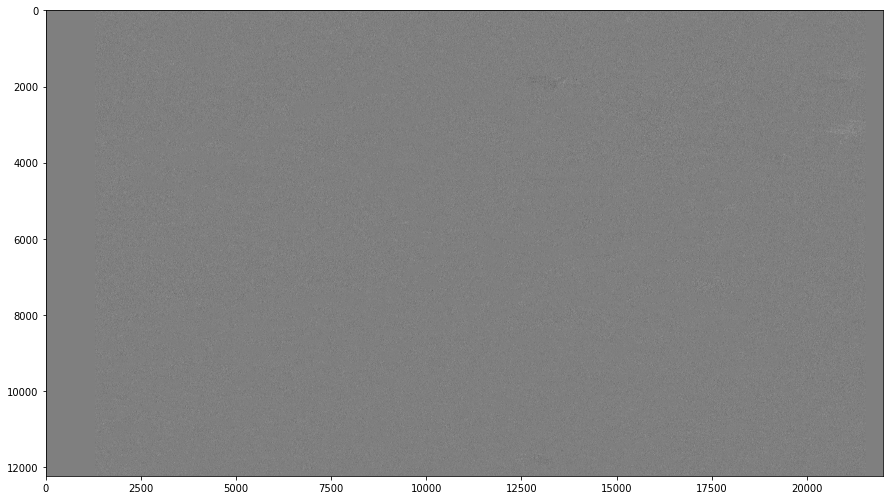

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(expansao(C12_real), cmap='gray')

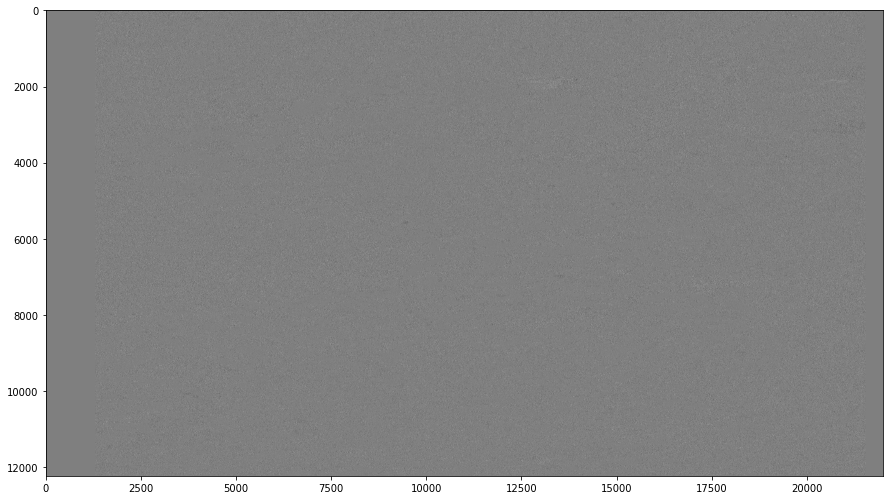

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(expansao(C12_imag), cmap='gray')

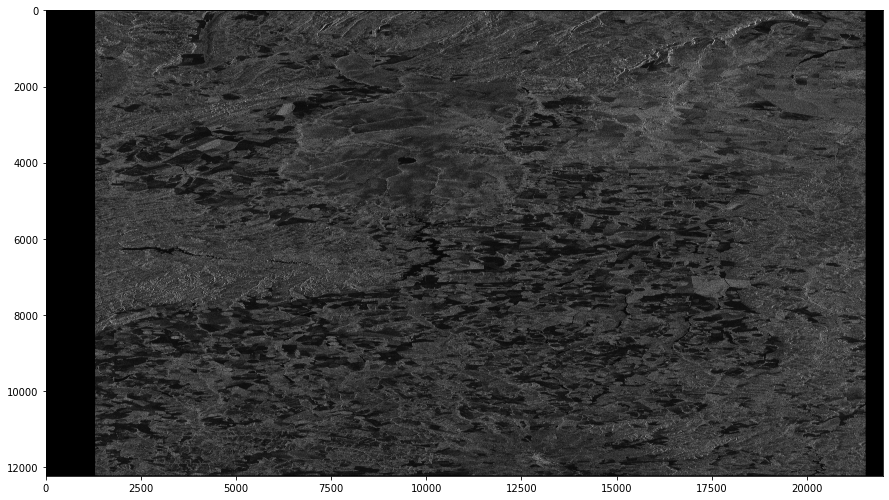

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(expansao(C22), cmap='gray')